<a href="https://colab.research.google.com/github/NarciSource/Aivle--MiniProject-4-1/blob/main/3.%20%EB%AA%A8%EB%8D%B8%EB%A7%81_4%EC%B0%A8%EB%AF%B8%ED%94%84_%EC%97%90%EC%9D%B4%EB%B8%94%EB%9F%AC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 안녕하세요^^
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [1]:
# 학습/평가 데이터 로딩
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# 학습 데이터 로딩
train_x = pd.read_csv('/content/drive/MyDrive/aivle/mp4/train_x.csv')
train_y = pd.read_csv('/content/drive/MyDrive/aivle/mp4/train_y.csv')
test_x = pd.read_csv('/content/drive/MyDrive/aivle/mp4/test_x.csv')
test_y = pd.read_csv('/content/drive/MyDrive/aivle/mp4/test_y.csv')

In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(8759, 11) (8759, 1) (4319, 11) (4319, 1)


---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [5]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
sns.set(font="NanumBarunGothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [6]:
label_date = test_x.apply(lambda x: str(int(x['month']))+"월"+str(int(x['day']))+"일"+str(int(x['hour']+1))+"시간", axis=1)

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [7]:
from sklearn.metrics import *

In [8]:
# 아래에 실습코드를 작성하세요.
from sklearn.linear_model import LinearRegression

In [9]:
# 아래에 실습코드를 작성하세요.
model_lr = LinearRegression()
model_lr.fit(train_x, train_y)

LinearRegression()

In [10]:
pred_y = model_lr.predict(test_x)

print(model_lr.score(test_x, test_y))
print(mean_squared_error(test_y, pred_y, squared=False))

0.9710813221736637
604.040113202121


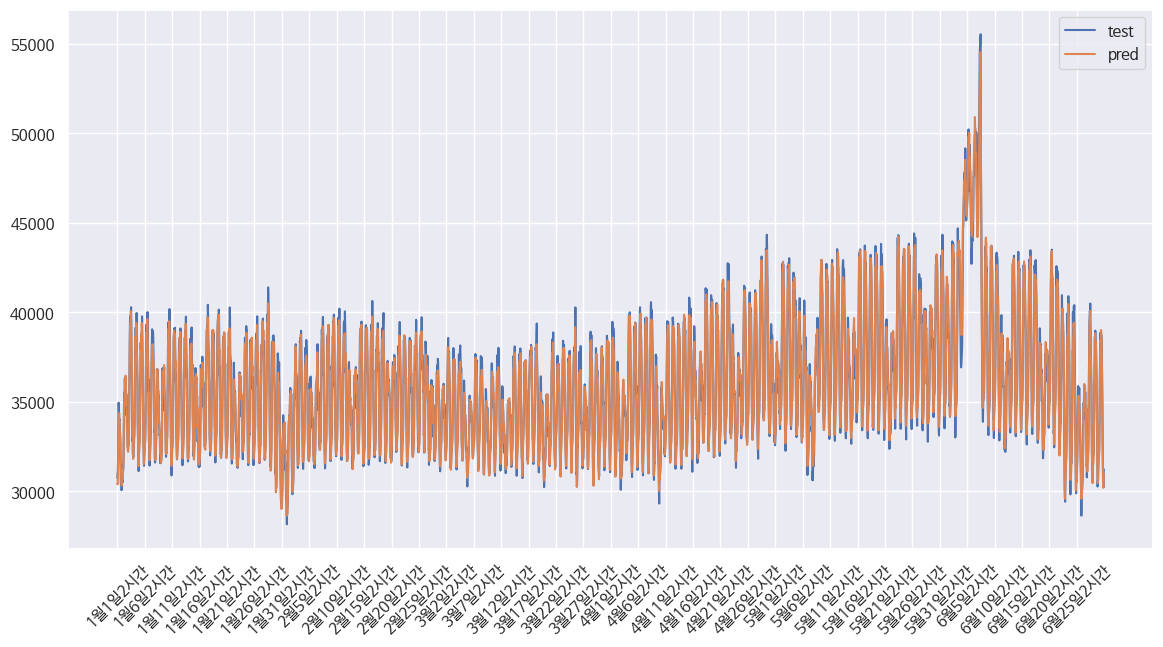

In [11]:
plt.figure(figsize=(14,7))
plt.plot(label_date, test_y, label='test')
plt.plot(label_date, pred_y, label='pred')
plt.xticks(range(0,len(label_date),24*5), rotation=45)
plt.legend()
plt.show()

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import RandomForestRegressor

In [13]:
# 아래에 실습코드를 작성하세요.
model_rf = RandomForestRegressor()
model_rf.fit(train_x, train_y)

<ipython-input-13-290f78c9cbe7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(train_x, train_y)


RandomForestRegressor()

In [14]:
# 아래에 실습코드를 작성하세요.
pred_y = model_rf.predict(test_x)

print(model_rf.score(test_x, test_y))
print(mean_squared_error(test_y, pred_y, squared=False))

0.9120632305200104
1053.3236060828244


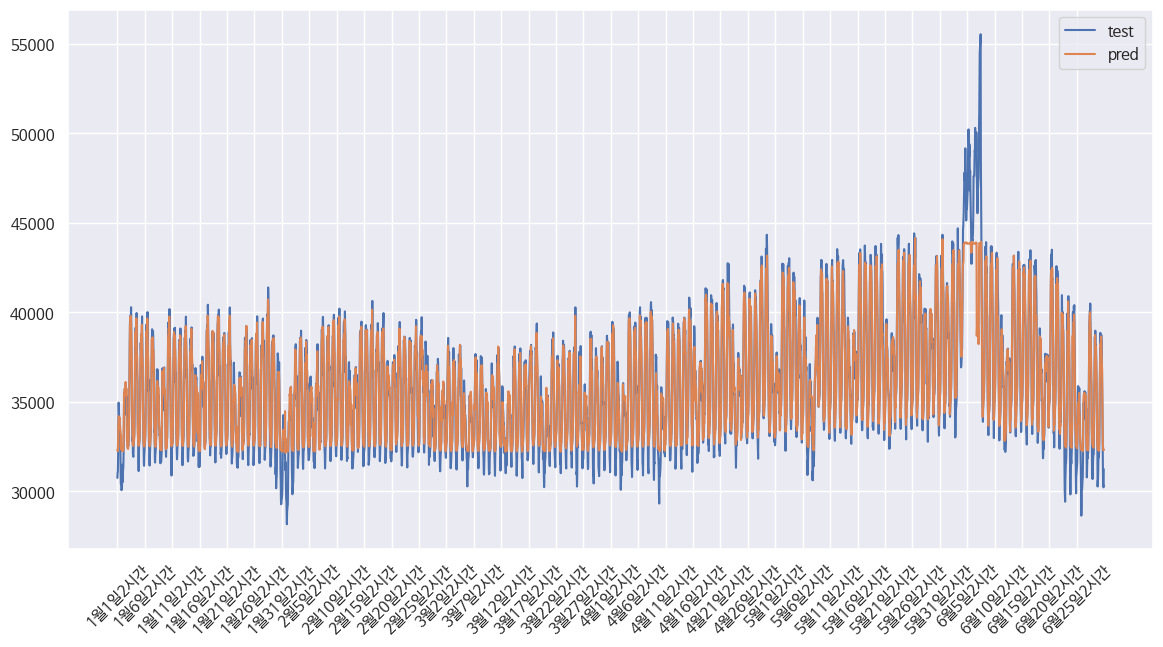

In [15]:
plt.figure(figsize=(14,7))
plt.plot(label_date, test_y, label='test')
plt.plot(label_date, pred_y, label='pred')
plt.xticks(range(0,len(label_date),24*5), rotation=45)
plt.legend()
plt.show()

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

[7.10817799e-04 6.85449048e-04 4.75234332e-03 4.78894753e-03
 1.40530452e-01 2.25252157e-03 8.03125787e-01 3.64458055e-02
 3.86542520e-03 1.60735683e-03 1.23509380e-03]


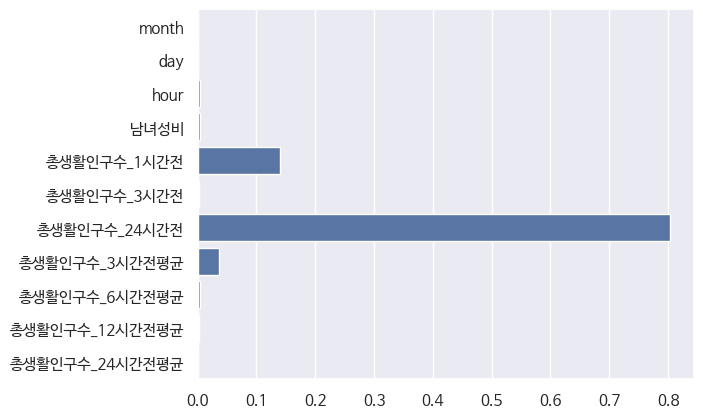

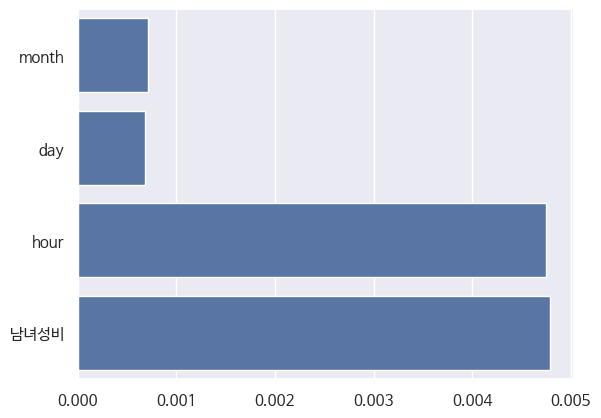

In [16]:
# Feature의 중요도 확인
print(model_rf.feature_importances_)
sns.barplot(x=list(model_rf.feature_importances_), y= list(test_x))
plt.show()

sns.barplot(x=list(model_rf.feature_importances_[:4]), y=list(test_x)[:4])
plt.show()

In [17]:
# 확인할 수 있는 인사이트
# 1. 하루전 동일시간과 상관이 크다.
# 2. 직전 1시간전에서 영향을 받는다.
# 3. 계절성은 약하며 그중에선 시간과 남녀성비가 상관이 조금 있다.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [18]:
# 아래에 실습코드를 작성하세요.
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
# 아래에 실습코드를 작성하세요.
model_gbr = GradientBoostingRegressor()
model_gbr.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [20]:
# 아래에 실습코드를 작성하세요.
pred_y = model_gbr.predict(test_x)

print(model_gbr.score(test_x, test_y))
print(mean_squared_error(test_y, pred_y, squared=False))

0.9300161715223416
939.6701093396547


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

[3.06353637e-05 5.95236650e-05 9.51886262e-03 1.28861146e-03
 3.78035450e-01 4.29417205e-04 5.31758937e-01 7.52836546e-02
 2.40534980e-03 2.86489601e-04 9.03068405e-04]


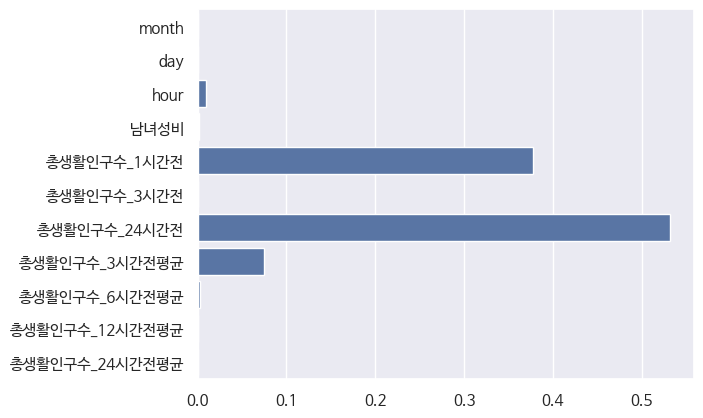

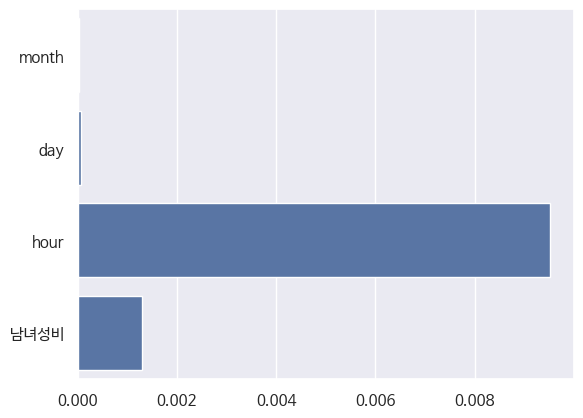

In [21]:
# Feature의 중요도 확인
print(model_gbr.feature_importances_)
sns.barplot(x=list(model_gbr.feature_importances_), y= list(test_x))
plt.show()

sns.barplot(x=list(model_gbr.feature_importances_[:4]), y=list(test_x)[:4])
plt.show()

In [22]:
# 확인할 수 있는 인사이트
# 1. 24시간 전과 1시간 전의 상관이 크다.
# 2. 시간의 계절성이 더 강하게 표현되었다.

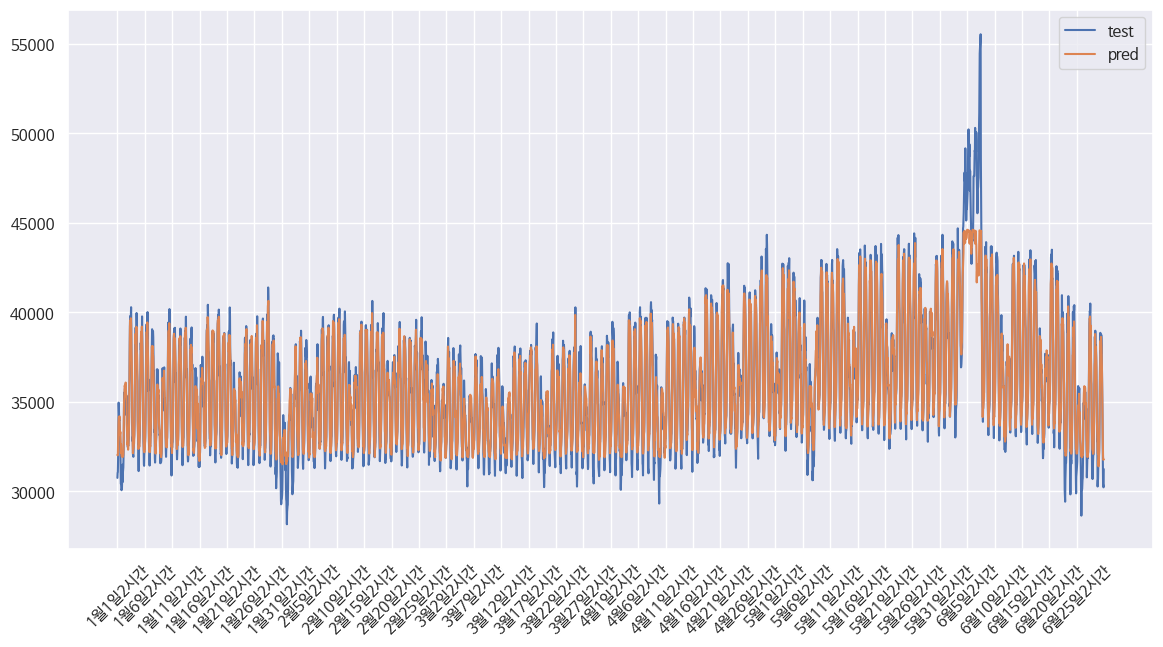

In [23]:
plt.figure(figsize=(14,7))
plt.plot(label_date, test_y, label='test')
plt.plot(label_date, pred_y, label='pred')
plt.xticks(range(0,len(label_date),24*5), rotation=45)
plt.legend()
plt.show()

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [24]:
!pip install lightgbm

In [25]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
model_lgbm.fit(train_x, train_y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2109
[LightGBM] [Info] Number of data points in the train set: 8759, number of used features: 11
[LightGBM] [Info] Start training from score 37395.769893


LGBMRegressor()

In [26]:
pred_y = model_lgbm.predict(test_x)

print(model_lgbm.score(test_x, test_y))
print(mean_squared_error(test_y, pred_y, squared=False))

0.9148190377779766
1036.6874346561924


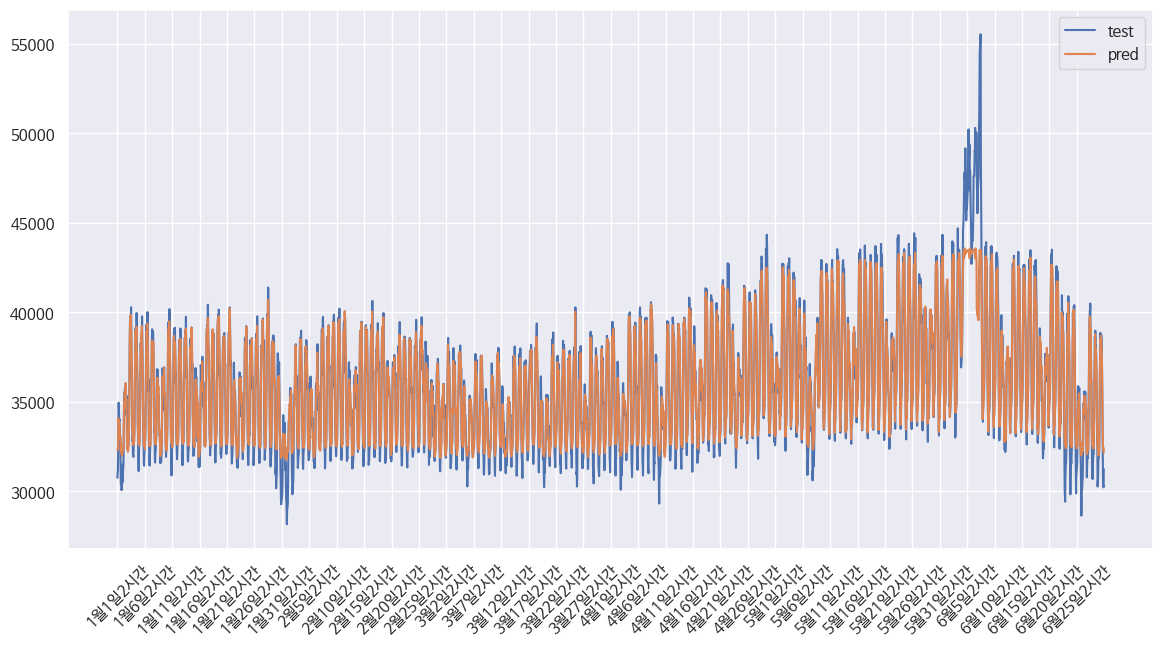

In [27]:
plt.figure(figsize=(14,7))
plt.plot(label_date, test_y, label='test')
plt.plot(label_date, pred_y, label='pred')
plt.xticks(range(0,len(label_date),24*5), rotation=45)
plt.legend()
plt.show()

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

[3.06353637e-05 5.95236650e-05 9.51886262e-03 1.28861146e-03
 3.78035450e-01 4.29417205e-04 5.31758937e-01 7.52836546e-02
 2.40534980e-03 2.86489601e-04 9.03068405e-04]


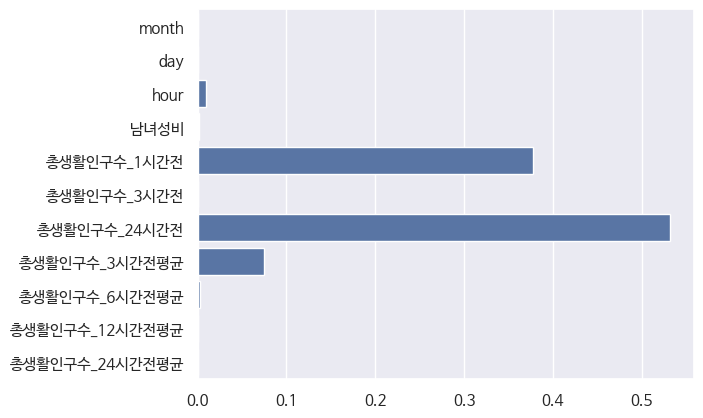

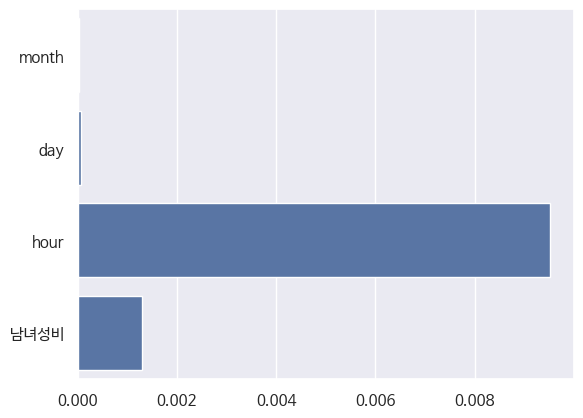

In [28]:
# Feature의 중요도 확인
print(model_gbr.feature_importances_)
sns.barplot(x=list(model_gbr.feature_importances_), y= list(test_x))
plt.show()

sns.barplot(x=list(model_gbr.feature_importances_[:4]), y=list(test_x)[:4])
plt.show()

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요.


In [29]:
# 아래에 실습코드를 작성하세요.
from sklearn.preprocessing import MinMaxScaler

In [30]:
print(train_y['총생활인구수'].max(), train_y['총생활인구수'].min())

45126.21397499995 31282.88037999996


In [31]:
print(test_y['총생활인구수'].max(), test_y['총생활인구수'].min())

55541.8422999999 28168.6909999999


In [32]:
min_val = train_y['총생활인구수'].min()
max_val = train_y['총생활인구수'].max()

def minmax_scaling(serial):
    return (serial - min_val) / (max_val - min_val)

In [33]:
train_x_s = train_x[:]

for column in train_x.columns:
    if '총생활인구수' in column:
        train_x_s[column] = minmax_scaling(train_x[column])
train_x_s

,month,day,hour,남녀성비,총생활인구수_1시간전,총생활인구수_3시간전,총생활인구수_24시간전,총생활인구수_3시간전평균,총생활인구수_6시간전평균,총생활인구수_12시간전평균,총생활인구수_24시간전평균
0,1,1,1,1.009861,0.095873,0.154550,0.131054,0.064514,0.064514,0.064514,0.064514
1,1,1,2,1.012752,0.110179,0.248940,0.137910,0.070352,0.070352,0.070352,0.070352
2,1,1,3,1.010131,0.154550,0.293128,0.144787,0.078859,0.078859,0.078859,0.078859
3,1,1,4,1.007293,0.248940,0.274928,0.184120,0.094081,0.086689,0.086689,0.086689
4,1,1,5,1.009817,0.293128,0.304135,0.318849,0.120201,0.100261,0.100261,0.100261
...,...,...,...,...,...,...,...,...,...,...,...
8754,12,30,19,1.030794,0.187283,0.171694,0.239648,0.374458,0.433914,0.462956,0.344319
8755,12,30,20,1.042064,0.164995,0.148638,0.171096,0.334754,0.389056,0.444265,0.344292
8756,12,30,21,1.049342,0.171694,0.137486,0.119732,0.263378,0.335574,0.419041,0.343485
8757,12,30,22,1.043915,0.148638,0.157037,0.089404,0.206077,0.290268,0.391311,0.342856


In [34]:
test_x_s = test_x[:]

for column in test_x.columns:
    if '총생활인구수' in column:
        test_x_s[column] = minmax_scaling(test_x[column])
test_x_s

,month,day,hour,남녀성비,총생활인구수_1시간전,총생활인구수_3시간전,총생활인구수_24시간전,총생활인구수_3시간전평균,총생활인구수_6시간전평균,총생활인구수_12시간전평균,총생활인구수_24시간전평균
0,1,1,1,1.039602,-0.016904,0.031210,-0.018699,-0.055849,-0.055849,-0.055849,-0.055849
1,1,1,2,1.054242,-0.014937,0.150648,-0.006343,-0.046828,-0.046828,-0.046828,-0.046828
2,1,1,3,1.038614,0.031210,0.265825,0.004846,-0.036853,-0.036853,-0.036853,-0.036853
3,1,1,4,1.060294,0.150648,0.264827,0.051300,-0.023216,-0.031374,-0.031374,-0.031374
4,1,1,5,1.076913,0.265825,0.218758,0.127406,-0.000210,-0.018857,-0.018857,-0.018857
...,...,...,...,...,...,...,...,...,...,...,...
4314,6,29,19,1.035272,-0.061905,-0.075892,0.121844,0.225349,0.352157,0.427396,0.252525
4315,6,29,20,1.048203,-0.067180,-0.002273,-0.019375,0.134659,0.269426,0.393552,0.248859
4316,6,29,21,1.046618,-0.075892,0.035054,-0.025976,0.030037,0.176698,0.342766,0.249307
4317,6,29,22,1.072724,-0.002273,0.026008,-0.055863,-0.033230,0.096059,0.294453,0.248541


---

# 2. Deep Learning
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [35]:
dummy_cols = ['month']
train_x_s_d = pd.get_dummies(train_x_s, columns=dummy_cols)
train_x_s_d.head(0)

,day,hour,남녀성비,총생활인구수_1시간전,총생활인구수_3시간전,총생활인구수_24시간전,총생활인구수_3시간전평균,총생활인구수_6시간전평균,총생활인구수_12시간전평균,총생활인구수_24시간전평균,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12


In [36]:
test_x_s_d = pd.get_dummies(test_x_s, columns=dummy_cols)
for i in range(7,13):
    test_x_s_d['month_'+str(i)] = 0
test_x_s_d.head(0)

,day,hour,남녀성비,총생활인구수_1시간전,총생활인구수_3시간전,총생활인구수_24시간전,총생활인구수_3시간전평균,총생활인구수_6시간전평균,총생활인구수_12시간전평균,총생활인구수_24시간전평균,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12


In [37]:
print(train_x_s_d.shape, test_x_s_d.shape)

(8759, 22) (4319, 22)


In [38]:
# 아래에 실습코드를 작성하세요.
import tensorflow as tf

In [39]:
import numpy as np

In [40]:
 train_X_rnn = np.array(train_x_s_d).reshape((train_x_s_d.shape[0], train_x_s_d.shape[1], 1)).astype(float)
 test_X_rnn = np.array(test_x_s_d).reshape((test_x_s_d.shape[0], test_x_s_d.shape[1], 1)).astype(float)

 train_X_rnn.shape

(8759, 22, 1)

In [41]:
tf.keras.backend.clear_session()

il = tf.keras.layers.Input(shape=train_X_rnn.shape[1:])

hl = tf.keras.layers.LSTM(8, return_sequences=True)(il)
hl = tf.keras.layers.LSTM(4, return_sequences=True)(hl)

hl = tf.keras.layers.Flatten()(hl)

hl = tf.keras.layers.Dense(32, activation='relu')(hl)
hl = tf.keras.layers.Dense(16, activation='relu')(hl)

ol = tf.keras.layers.Dense(1, activation='relu')(hl)

model_dl = tf.keras.Model(il, ol)
model_dl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 22, 8)             320       
                                                                 
 lstm_1 (LSTM)               (None, 22, 4)             208       
                                                                 
 flatten (Flatten)           (None, 88)                0         
                                                                 
 dense (Dense)               (None, 32)                2848      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17    

In [42]:
rmse_loss = lambda y, y_pred: tf.math.sqrt(tf.math.reduce_mean(tf.math.square(y - y_pred)))

earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)


In [43]:
model_dl.compile(loss=rmse_loss, optimizer='adam')
history = model_dl.fit(train_X_rnn, train_y, epochs=10000, verbose=1,
          validation_split=0.2, # 매 epoch 마다 랜덤하게 20% validation 데이터로 사용
          callbacks=[earlyStopping])

Epoch 1/10000
219/219 [==============================] - 20s 40ms/step - loss: 37195.9219 - val_loss: 36577.6250
Epoch 2/10000
219/219 [==============================] - 8s 35ms/step - loss: 33508.2500 - val_loss: 29397.4609
Epoch 3/10000
219/219 [==============================] - 3s 14ms/step - loss: 21450.9414 - val_loss: 11805.9316
Epoch 4/10000
219/219 [==============================] - 3s 13ms/step - loss: 4220.5371 - val_loss: 2185.2361
Epoch 5/10000
219/219 [==============================] - 4s 17ms/step - loss: 1916.5801 - val_loss: 1908.9087
Epoch 6/10000
219/219 [==============================] - 4s 18ms/step - loss: 957.4520 - val_loss: 887.2631
Epoch 7/10000
219/219 [==============================] - 3s 13ms/step - loss: 571.3233 - val_loss: 1109.3126
Epoch 8/10000
219/219 [==============================] - 3s 13ms/step - loss: 544.3684 - val_loss: 792.0859
Epoch 9/10000
219/219 [==============================] - 3s 14ms/step - loss: 520.0606 - val_loss: 717.4476
Epoch 10/1

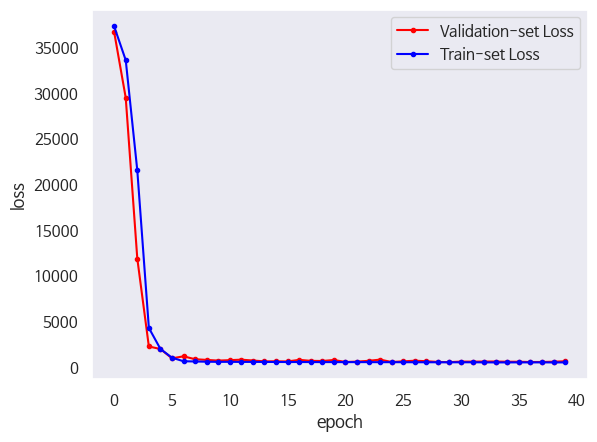

In [44]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [45]:
from sklearn.metrics import *
import seaborn as sns

In [46]:
pred_y = model_dl.predict(test_X_rnn)
print(mean_squared_error(pred_y, test_y, squared=False))
print(r2_score(test_y, pred_y))

135/135 [==============================] - 2s 5ms/step
1288.5604656405492
0.8683998217210329


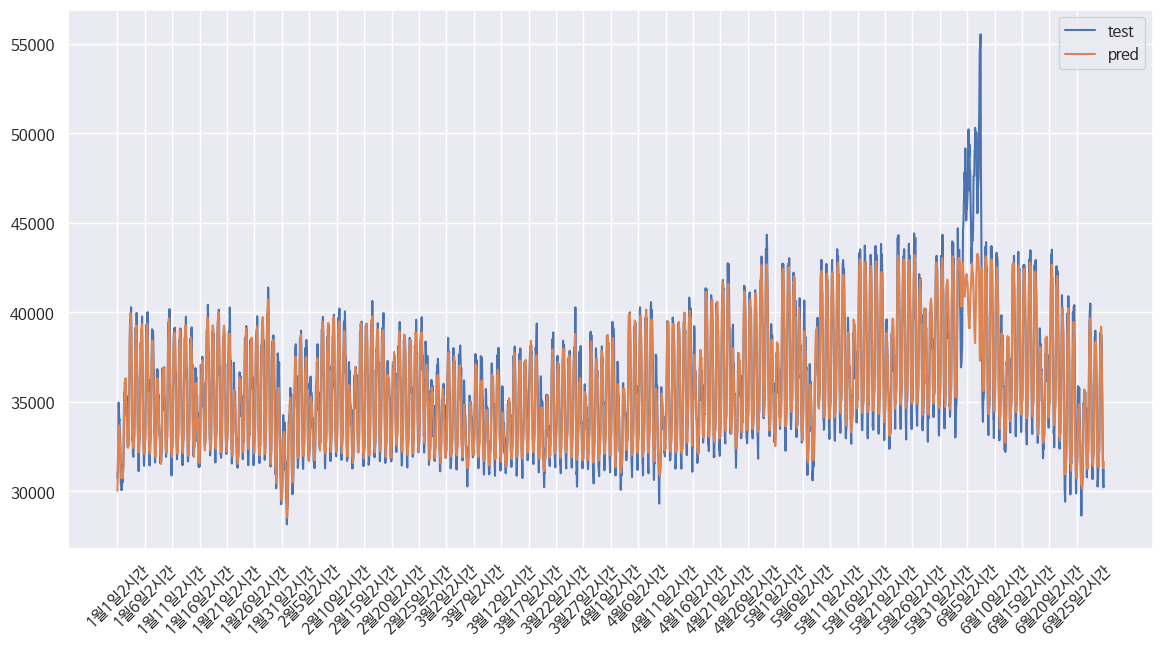

In [47]:
plt.figure(figsize=(14,7))
plt.plot(label_date, test_y, label='test')
plt.plot(label_date, pred_y, label='pred')
plt.xticks(range(0,len(label_date),24*5), rotation=45)
plt.legend()
plt.show()